In [72]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from batchbald_redux import repeated_mnist, active_learning, batchbald
from main.models import ConvNet
from main.training_models import test_performance
from main.utils import save_experiment, load_experiment
from laplace.curvature import AsdlGGN, AsdlGGN
from main.laplace_batch import get_laplace_batch
from dataclasses import dataclass
from main.active_learning import run_active_learning

%reload_ext autoreload
%autoreload 2

In [2]:
# loading data
train_dataset, test_dataset = repeated_mnist.create_MNIST_dataset()

In [57]:
# set configurations
@dataclass
class ActiveLearningConfig:
    subset_of_weights: str = 'last_layer'
    hessian_structure: str = 'kron'
    backend: str = 'AsdlGGN'
    temperature: float = 1.0
    max_training_samples: int = 100
    acquisition_batch_size: int = 5
    al_method: str = 'entropy'
    test_batch_size: int = 512
    num_classes: int = 10
    num_initial_samples: int = 40
    training_iterations: int = 4096 
    scoring_batch_size: int = 64
    train_batch_size: int = 64
    extract_pool: int = 59000

## Runs Active Learning with settings

In [54]:
config = ActiveLearningConfig()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


In [58]:
results = run_active_learning(
    train_dataset=train_dataset,
    test_dataset=test_dataset, 
    model_constructor=ConvNet, 
    config=config, 
    device=device
    )























2024-07-26 15:56:13,894 - INFO - Training set size: 40, Test set accuracy: 73.00, Test set loss: -0.0154


Fitting Laplace


c:\Users\vince\Documents\Statistics\TT\msc_thesis\.venv\Lib\site-packages\torch\nn\modules\module.py:1373: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
c:\Users\vince\Documents\Statistics\TT\msc_thesis\.venv\Lib\site-packages\laplace\baselaplace.py:409: UserWarning: By default `link_approx` is `probit`. Make sure to set it equals to the way you want to call `la(test_data, pred_type=..., link_approx=...)`.
  warnings.warn(


Optimizing prior precision


Dataset indices:  [31817  5422 56694 39230 45426]
Scores:  [1.9564554691314697, 1.948778510093689, 1.9404723644256592, 1.9169948101043701, 1.8977845907211304]
Labels:  tensor([4, 7, 7, 5, 0])
























2024-07-26 15:56:38,958 - INFO - Training set size: 45, Test set accuracy: 75.73, Test set loss: -0.0126


Fitting Laplace
Optimizing prior precision


Dataset indices:  [33930  7750 35379 39885 39419]
Scores:  [1.9005898237228394, 1.8135981559753418, 1.7679665088653564, 1.7318919897079468, 1.7236356735229492]
Labels:  tensor([2, 8, 3, 3, 8])

































2024-07-26 15:57:05,283 - INFO - Training set size: 50, Test set accuracy: 76.64, Test set loss: -0.0187


Fitting Laplace
Optimizing prior precision


Dataset indices:  [47004 25724 43534 17093  5084]
Scores:  [1.894948124885559, 1.8686481714248657, 1.8663221597671509, 1.8395406007766724, 1.7699369192123413]
Labels:  tensor([1, 1, 8, 6, 6])































2024-07-26 15:57:33,375 - INFO - Training set size: 55, Test set accuracy: 74.82, Test set loss: -0.0176


Fitting Laplace
Optimizing prior precision


Dataset indices:  [23009 11851 21636 47890 39751]
Scores:  [2.0352025032043457, 2.001803159713745, 1.8080132007598877, 1.7939883470535278, 1.7859691381454468]
Labels:  tensor([0, 0, 2, 2, 8])


































2024-07-26 15:58:01,190 - INFO - Training set size: 60, Test set accuracy: 78.59, Test set loss: -0.0162


Fitting Laplace
Optimizing prior precision


Dataset indices:  [45446 15503 39841 14418 34694]
Scores:  [1.9490633010864258, 1.8761818408966064, 1.7922948598861694, 1.7847521305084229, 1.7550535202026367]
Labels:  tensor([7, 9, 8, 6, 9])



























2024-07-26 15:58:28,256 - INFO - Training set size: 65, Test set accuracy: 76.95, Test set loss: -0.0176


Fitting Laplace
Optimizing prior precision


Dataset indices:  [30280 23078 39114  7146  5562]
Scores:  [1.7912009954452515, 1.780697226524353, 1.7598536014556885, 1.7492319345474243, 1.739782452583313]
Labels:  tensor([5, 8, 5, 2, 3])



























2024-07-26 15:58:56,392 - INFO - Training set size: 70, Test set accuracy: 78.29, Test set loss: -0.0112


Fitting Laplace
Optimizing prior precision


Dataset indices:  [47506 29259   138 56594 50802]
Scores:  [1.8079607486724854, 1.8011873960494995, 1.7694367170333862, 1.7500600814819336, 1.7390754222869873]
Labels:  tensor([8, 8, 5, 8, 2])



























2024-07-26 15:59:22,763 - INFO - Training set size: 75, Test set accuracy: 76.11, Test set loss: -0.0176


Fitting Laplace
Optimizing prior precision


Dataset indices:  [34328 11513 24852  7478 17384]
Scores:  [1.875054955482483, 1.799182653427124, 1.7614291906356812, 1.7190932035446167, 1.6928352117538452]
Labels:  tensor([8, 3, 8, 9, 9])































2024-07-26 15:59:50,102 - INFO - Training set size: 80, Test set accuracy: 82.81, Test set loss: -0.0163


Fitting Laplace
Optimizing prior precision


Dataset indices:  [21872 28838   173 48983 48789]
Scores:  [1.9635062217712402, 1.8827369213104248, 1.7339626550674438, 1.7234362363815308, 1.7014387845993042]
Labels:  tensor([9, 9, 5, 5, 9])





























2024-07-26 16:00:16,420 - INFO - Training set size: 85, Test set accuracy: 79.03, Test set loss: -0.0166


Fitting Laplace
Optimizing prior precision


Dataset indices:  [26114 22908 24739 32173 58682]
Scores:  [1.887557864189148, 1.8596341609954834, 1.7370729446411133, 1.7348679304122925, 1.700541615486145]
Labels:  tensor([6, 6, 6, 7, 6])



























2024-07-26 16:00:42,412 - INFO - Training set size: 90, Test set accuracy: 82.07, Test set loss: -0.0183


Fitting Laplace
Optimizing prior precision


Dataset indices:  [48802 37816 21390 57285 55758]
Scores:  [1.5454672574996948, 1.504029393196106, 1.503071904182434, 1.4850330352783203, 1.4781132936477661]
Labels:  tensor([9, 1, 3, 7, 3])





























2024-07-26 16:01:09,767 - INFO - Training set size: 95, Test set accuracy: 81.65, Test set loss: -0.0130


Fitting Laplace
Optimizing prior precision


Dataset indices:  [41209 37136  7746 30111 40264]
Scores:  [1.7837772369384766, 1.700110673904419, 1.6932194232940674, 1.6785383224487305, 1.6771998405456543]
Labels:  tensor([1, 9, 1, 8, 9])



























2024-07-26 16:01:37,725 - INFO - Training set size: 100, Test set accuracy: 84.63, Test set loss: -0.0153
Training Set Size: 100%|██████████| 100/100 [05:34<00:00,  5.57s/it]


In [86]:
sns.set_palette(sns.color_palette("Spectral"))

Text(0, 0.5, 'Test Accuracy')

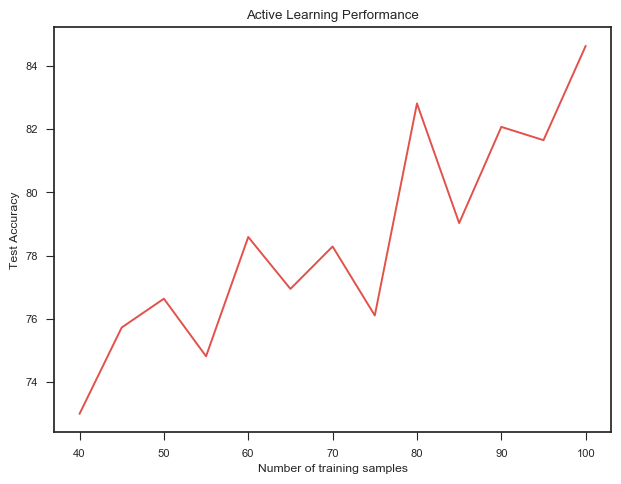

In [87]:
sns.lineplot(x=np.arange(start=config.num_initial_samples, stop=config.max_training_samples + 1, step=config.acquisition_batch_size),
            y=results['test_accs'])
plt.title('Active Learning Performance')
plt.xlabel('Number of training samples')
plt.ylabel('Test Accuracy')

2024-07-26 16:17:11,929 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-26 16:17:11,936 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'Class distribution of added samples')

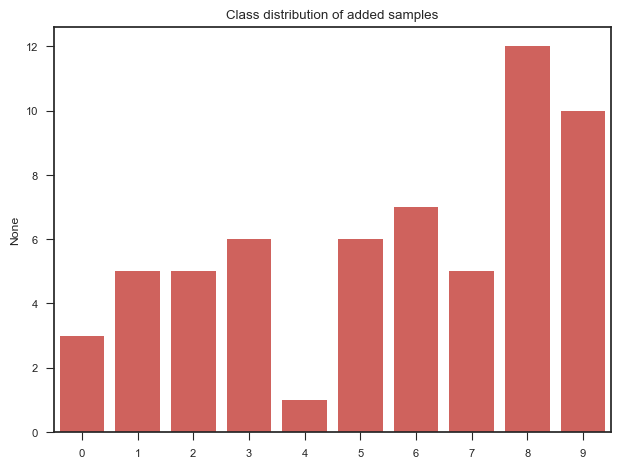

In [93]:
labels = torch.stack(results['added_labels'])

# give counts for each class
counts = torch.zeros(config.num_classes)
for i in range(config.num_classes):
    counts[i] = (labels == i).sum()

sns.barplot(x=np.arange(config.num_classes), y=counts)
plt.title('Class distribution of added samples')